# Week 3. Knowledge Distillation

---

## Sphisticated models and their problems
---
- Larger sophisticated models become complex
- Complex models learn complex tasks
- Can we express this learning more efficiently?

Is it possible to "distill" or concentrate this complexity into smaller networks?

## Knowledge distillation
- Duplicate the performance of a complex model in a simpler model
- Idea: Create a simple "student" model that learn from a complex "teacher" model

<img src = "https://i.gyazo.com/fb56958c93a96fd867b96734931a51ea.png">

### Teacher and student
- Training objectives of the models vary
- Teacher (normal training): maximizes the actual metric
- Student (knowledge transfer): 1. matches $p$-distribution of teacher's predictions to form "soft targets"
2. "Soft targets" tell us about the knowledge learned by the teacher

### Transferring "dark knowledge" to student
- Improve softness of the teacher's distribution with "softmax temperature" ($T$)
- As $T$ grows, you get more insight about which classes the teacher find similar to the predicted one
$$p_i = \frac{\exp(\frac{z_i}{T})}{\sum_{j} \exp(\frac{z_j}{T})} $$

- When the softmax temperature decreases, the soft targets defined by the teacher network become less informative
- When computing the the "standard" loss between the student's predicted class probabilities and the ground-truth “hard” labels, we use a value of the softmax temperature T equal to 1 
- The teacher network is trained to maximize its accuracy and the the student network uses a cost function to approximate the probability distributions of the predictions of the teacher network.

In [5]:
import numpy as np
values = np.random.rand(10)
values

array([0.07584816, 0.97915338, 0.96562789, 0.99922834, 0.23390539,
       0.18102755, 0.60867472, 0.28182518, 0.53737979, 0.25992342])

In [32]:
def softmax_layer(values, T = 1):
    values = values / T
    denom = np.exp(values).sum()
    probs = list()
    for i in range(len(values)):
        num = values[i]
        prob = np.exp(num) / denom
        probs.append(prob)
    return np.array(probs)

In [33]:
import matplotlib.pyplot as plt
x = range(0, len(distribution))

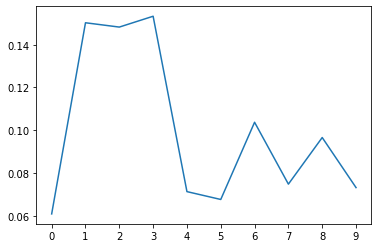

In [58]:
distribution = softmax_layer(values)
plt.plot(distribution)
plt.xticks(x)
plt.show()

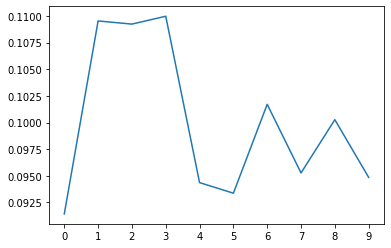

In [56]:
distribution = softmax_layer(values, T = 5)
plt.plot(distribution)
plt.xticks(x)
plt.show()

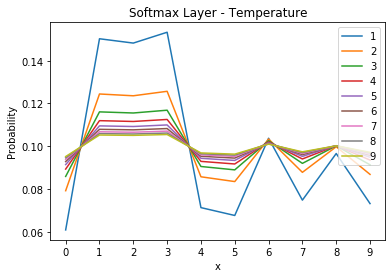

In [54]:
TS = range(1, 10)
for T in TS:
    distribution = softmax_layer(values, T = T)
    plt.plot(distribution)
plt.xticks(x)
plt.legend(TS, loc = 1)
plt.title("Softmax Layer - Temperature")
plt.ylabel("Probability")
plt.xlabel("x")
plt.show()

### Techniques
- Approach #1: **Weigh objectives** (student and teacher) and combine during backprop
- Approach #2: **Compare distributions of the predictions** (student and teacher) using KL divergence

### KL Divergence $L_{KL}$
$$L = (1 - \alpha)L_H + \alpha L_{KL}$$

- $L_{H}$ is the cross-entropy loss from the hard labels, and 
- $L_{KL}$ is the Kullback-Leibler divergence loss from the teacher's logits
- The Kullback-Leibler divergence here is a metric of the difference between two probability distributions. You want those two probability distributions to be as close as possible.

<img src = "https://i.gyazo.com/9a338ee8edb5225eeb0c176208d2c077.png" width = "500px">

<img src = "https://i.gyazo.com/4755e96c16b80953c01249e73ae0089b.png" width = "500px">

In [61]:
def loss(alpha, LH, LKL):
    return (1 - alpha) * LH + alpha * LKL